In [15]:
#Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("globalairpollution.csv")

In [19]:
df.shape

(23463, 12)

In [21]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [25]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [27]:
df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Seleção das features e da variável alvo
X = df[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]  # Features
y = df['AQI Value']  # Variável alvo

In [51]:
# Criar uma cópia de X para evitar o 'SettingWithCopyWarning'
X = X.copy()

# Preencher os valores ausentes com a média de cada coluna
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Divisão do dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Definir os modelos
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

In [55]:
# Definir os parâmetros para o GridSearch
param_grids = {
    "Linear Regression": {'fit_intercept': [True, False]},
    "Decision Tree": {'max_depth': [3, 5, 7, None]},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, None]}
}

In [57]:
# Treinamento e otimização dos hiperparâmetros
best_models = {}
for model_name in models:
    print(f"Treinando modelo: {model_name}")

    # Aplicar GridSearch
    grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=5)
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_

    print(f"Melhor parâmetro para {model_name}: {grid_search.best_params_}")
    print("-" * 50)

Treinando modelo: Linear Regression
Melhor parâmetro para Linear Regression: {'fit_intercept': True}
--------------------------------------------------
Treinando modelo: Decision Tree
Melhor parâmetro para Decision Tree: {'max_depth': None}
--------------------------------------------------
Treinando modelo: Random Forest
Melhor parâmetro para Random Forest: {'max_depth': None, 'n_estimators': 100}
--------------------------------------------------


In [58]:
# Avaliar o desempenho dos modelos
rmse_scores = {}
for model_name, model in best_models.items():
    # Prever com o modelo
    y_pred = model.predict(X_test)

    # Calcular o erro quadrático médio (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[model_name] = rmse

    print(f"RMSE para {model_name}: {rmse}")

RMSE para Linear Regression: 8.77451703814532
RMSE para Decision Tree: 3.1225757696907928
RMSE para Random Forest: 2.607665068713818


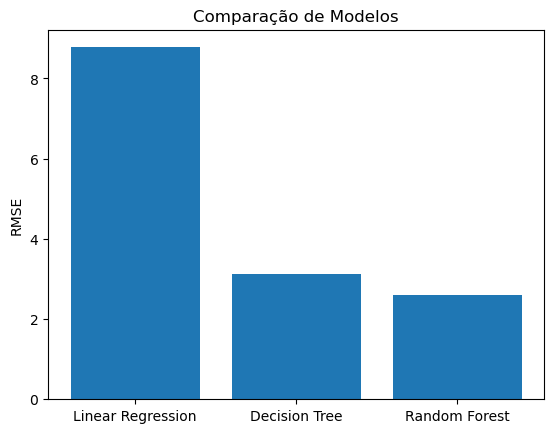

In [61]:
# Comparar os modelos
plt.bar(rmse_scores.keys(), rmse_scores.values())
plt.ylabel('RMSE')
plt.title('Comparação de Modelos')
plt.show()

In [67]:
import joblib

# Salve o modelo Random Forest treinado
joblib.dump(best_models['Random Forest'], 'random_forest_model.pkl')


['random_forest_model.pkl']